In [10]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import calendar
import seaborn as sns
%matplotlib inline
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore') #remove warning

In [11]:
df = pd.read_csv("https://media.githubusercontent.com/media/DBertazioli/NeoMeetup/master/csv/exported_queries/Distribuzione_temporale_eventi_fix.csv")
df.head()

,Unnamed: 0,name,country,state,lat,lon,timezone_str,time,datetime_timezoned
0,0,Identity Take Two (Evening Meetup),us,pa,40.09,-75.47,America/New_York,1.554507e+12,05/04/2019 20:00:00
1,1,Identity Tech Talk - Tap-and-Go AuthN for seam...,gb,gb,51.52,-0.11,Europe/London,1.556038e+12,23/04/2019 18:00:00
2,2,Identity Theft Protection ..Protecting Everyda...,us,sd,44.06,-103.28,America/Denver,1.554754e+12,08/04/2019 14:00:00
3,3,Identity and Access \u2013 pointing the future,nl,nl,52.37,4.89,Europe/Amsterdam,1.554223e+12,02/04/2019 19:00:00
4,4,Identity and self-discovery - at thirdspace in...,ca,bc,49.18,-122.81,America/Vancouver,1.554948e+12,10/04/2019 19:00:00


In [12]:
tmp = df['datetime_timezoned'].str.split(" ", n = 1, expand = True) #create distinct columns date and time
df['day'] = [calendar.day_name[dt.strptime(date, '%d/%m/%Y').weekday()] for date in tmp[0]] #transform date into day
df['dtime'] = tmp[1] #take time
df.head()

,Unnamed: 0,name,country,state,lat,lon,timezone_str,time,datetime_timezoned,day,dtime
0,0,Identity Take Two (Evening Meetup),us,pa,40.09,-75.47,America/New_York,1.554507e+12,05/04/2019 20:00:00,Friday,20:00:00
1,1,Identity Tech Talk - Tap-and-Go AuthN for seam...,gb,gb,51.52,-0.11,Europe/London,1.556038e+12,23/04/2019 18:00:00,Tuesday,18:00:00
2,2,Identity Theft Protection ..Protecting Everyda...,us,sd,44.06,-103.28,America/Denver,1.554754e+12,08/04/2019 14:00:00,Monday,14:00:00
3,3,Identity and Access \u2013 pointing the future,nl,nl,52.37,4.89,Europe/Amsterdam,1.554223e+12,02/04/2019 19:00:00,Tuesday,19:00:00
4,4,Identity and self-discovery - at thirdspace in...,ca,bc,49.18,-122.81,America/Vancouver,1.554948e+12,10/04/2019 19:00:00,Wednesday,19:00:00


In [13]:
df_date = df[['day','dtime']] #define new dataframe for explore with viz
df_date.head() #check

,day,dtime
0,Friday,20:00:00
1,Tuesday,18:00:00
2,Monday,14:00:00
3,Tuesday,19:00:00
4,Wednesday,19:00:00


In [15]:
df_date['day'] = pd.Categorical(df_date['day'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
#sorting the days of the week 
df_date['values'] = 1 #create a column that represent the single instance
pivot_table = df_date.pivot_table(values = 'values', index = 'day', columns = 'dtime', aggfunc = np.sum)
#using the representation of the value we can use np.sum to calculate the number event is organized in a certain
#week's day, in a certain hour
pivot_table

dtime,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
day,,,,,,,,,,,,,,,,,,,,,
Monday,25.0,5.0,2.0,2.0,NaN,5.0,56.0,84.0,158.0,386.0,...,143.0,137.0,189.0,475.0,2403.0,5366.0,1505.0,280.0,58.0,9.0
Tuesday,24.0,1.0,NaN,2.0,3.0,10.0,35.0,267.0,496.0,516.0,...,200.0,126.0,261.0,653.0,3949.0,7792.0,1790.0,331.0,48.0,38.0
Wednesday,18.0,2.0,2.0,4.0,4.0,12.0,45.0,330.0,438.0,586.0,...,222.0,162.0,246.0,761.0,4247.0,7904.0,2027.0,298.0,78.0,21.0
Thursday,32.0,3.0,2.0,1.0,3.0,12.0,48.0,247.0,436.0,506.0,...,229.0,196.0,282.0,746.0,4376.0,7859.0,1882.0,417.0,113.0,44.0
Friday,37.0,1.0,1.0,5.0,4.0,9.0,60.0,202.0,362.0,450.0,...,231.0,256.0,302.0,682.0,2073.0,3837.0,1760.0,547.0,285.0,66.0
Saturday,62.0,25.0,14.0,7.0,8.0,28.0,143.0,500.0,1249.0,2999.0,...,2206.0,1529.0,1150.0,1052.0,1538.0,2733.0,1778.0,489.0,351.0,130.0
Sunday,41.0,7.0,1.0,5.0,7.0,16.0,74.0,250.0,632.0,1412.0,...,2164.0,1543.0,1137.0,965.0,1097.0,1142.0,443.0,84.0,30.0,21.0


In [24]:
pivot_table = pivot_table.fillna(0)

In [28]:
pivot_table = pivot_table.astype(int)

In [26]:
rcParams['figure.figsize'] = 18,12 #define a parameter to change the figure size

Text(141.0, 0.5, 'Weekdays')

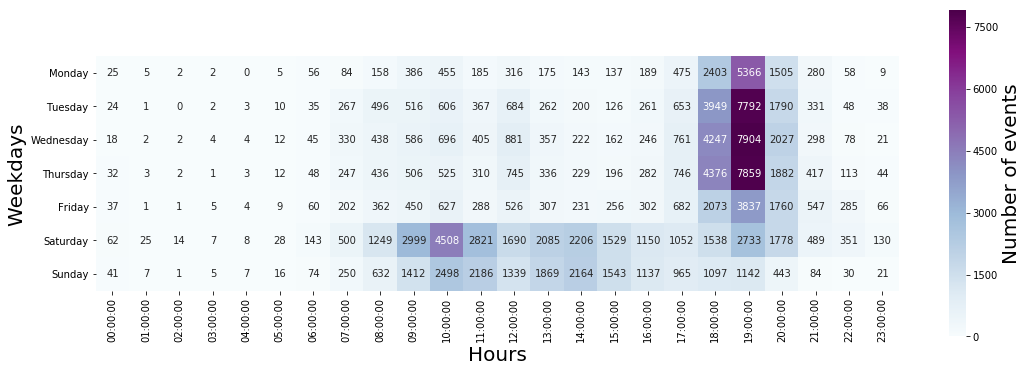

In [29]:
figure = sns.heatmap(pivot_table,cmap='BuPu', square = True, cbar_kws={"shrink": 0.5, 'label': 'Number of events'},
                    annot=True, fmt='d') #define an heatmap to plot our pivot_table
figure.figure.axes[-1].yaxis.label.set_size(20)
figure.set_xlabel("Hours", fontsize=20)
figure.set_ylabel("Weekdays", fontsize=20)